## Analysis of minum wind and solar rolling windows from Agora
### Data is from:
https://www.agora-energiewende.org/data-tools/agorameter/chart/today/power_generation/01.01.2021/30.11.2023/daily

### The Argument:
The plot generated in this notebook shows that electricity storage significantly mitigates the intermittency problem of solar and wind generation. The electricity storage is naively modelled as the `max()` function over windows of 4h, 8h, 24h and 48h.
It can be seen, that a time scale of 24h and 48h is superior over 4h and 8h regarding minimum generation over the year. Also 48h does not perform significantly better than 24h.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
paths_csv=[]
dfs=[]
df=None
for year in range(2020,2024):
  path=f"/content/drive/MyDrive/AgoraData/power_generation_and_consumption_{year}.csv"
  paths_csv.append(path)

  dfs.append(pd.read_csv(path))
df = pd.concat(dfs,ignore_index=True)
df=df.drop_duplicates()
df.head(-10)

,date_id,date_id.1,Biomass,Grid emission factor,Hard Coal,Hydro,Lignite,Natural Gas,Nuclear,Other,...,Solar,Conventional,Total electricity demand,Total grid emissions,Wind offshore,Wind onshore,Total Renewables,Total Conventional,Renewable share,Conventional share
0,2020-01-01T00:00:00,2020-01-01T00:00:00,5.156,423.125,2.193,1.756,9.517,7.904,8.078,3.195,...,0.000,31.202,45.358,18904.236,0.550,6.013,13.475,31.202,30.160933,69.839067
1,2020-01-01T01:00:00,2020-01-01T01:00:00,5.137,418.836,2.040,1.755,9.621,7.302,8.083,3.171,...,0.000,30.588,45.515,18629.681,1.170,5.829,13.891,30.587,31.231170,68.768830
2,2020-01-01T02:00:00,2020-01-01T02:00:00,5.139,405.507,2.009,1.788,9.628,7.023,8.076,3.147,...,0.000,31.228,46.738,18467.680,1.667,5.721,14.315,31.228,31.431834,68.568166
3,2020-01-01T03:00:00,2020-01-01T03:00:00,5.136,406.550,2.123,1.785,9.701,7.055,8.067,3.178,...,0.000,31.519,46.232,18685.912,2.064,5.459,14.444,31.519,31.425277,68.574723
4,2020-01-01T04:00:00,2020-01-01T04:00:00,5.138,407.388,2.149,1.720,9.754,6.901,8.067,3.196,...,0.000,31.358,46.546,18740.340,2.294,5.491,14.643,31.357,31.832609,68.167391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35049,2023-12-31T10:00:00,2023-12-31T10:00:00,5.083,163.211,1.908,2.137,3.392,4.637,0.000,2.251,...,5.059,12.576,47.841,9615.137,5.714,28.344,46.337,12.576,78.653268,21.346732
35050,2023-12-31T11:00:00,2023-12-31T11:00:00,5.140,159.249,1.943,2.190,3.400,4.246,0.000,2.245,...,6.146,11.848,50.075,9494.677,5.804,28.492,47.772,11.849,80.126130,19.873870
35051,2023-12-31T12:00:00,2023-12-31T12:00:00,5.181,158.873,1.943,2.153,3.421,4.163,0.000,2.238,...,6.116,11.831,50.344,9476.354,5.903,28.463,47.816,11.830,80.166315,19.833685
35052,2023-12-31T13:00:00,2023-12-31T13:00:00,5.220,162.508,1.919,2.101,3.442,4.114,0.000,2.254,...,4.869,11.789,51.172,9484.090,5.840,28.542,46.572,11.790,79.798499,20.201501


In [4]:
df.columns

Index(['date_id', 'date_id.1', 'Biomass', 'Grid emission factor', 'Hard Coal',
       'Hydro', 'Lignite', 'Natural Gas', 'Nuclear', 'Other',
       'Pumped storage generation', 'Solar', 'Conventional',
       'Total electricity demand', 'Total grid emissions', 'Wind offshore',
       'Wind onshore', 'Total Renewables', 'Total Conventional',
       'Renewable share', 'Conventional share'],
      dtype='object')

35061
0.29500000000000004


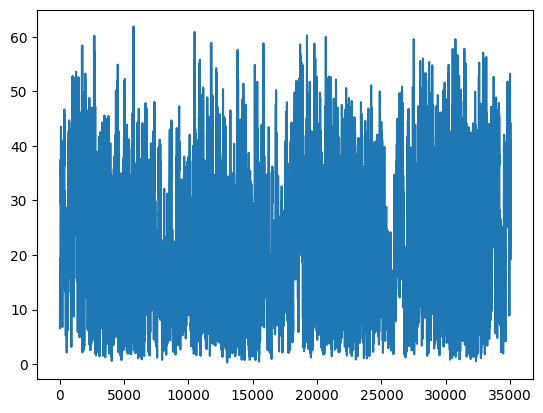

In [5]:
date_id=df["date_id"]
year = pd.to_datetime(date_id).dt.strftime('%Y')
month = pd.to_datetime(date_id).dt.strftime('%b')
total_demand=df["Total electricity demand"]
solar_and_wind=df["Solar"]+df["Wind onshore"]+ df["Wind offshore"]
print(len(solar_and_wind))
print(min(solar_and_wind))
#solar_and_wind.plot(kind="bar")
#solar_and_wind=solar_and_wind[5:-5]
plt.plot(solar_and_wind)

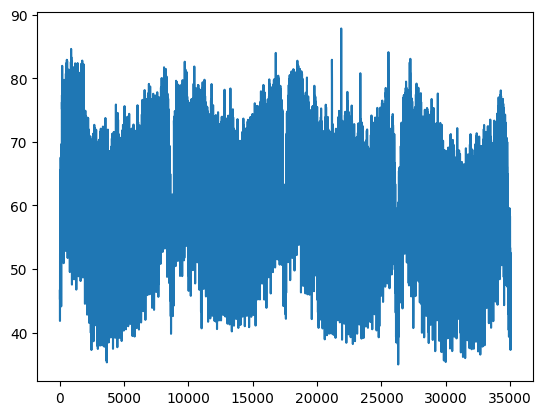

In [48]:
plt.plot(total_demand)

In [6]:
month.head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: date_id, dtype: object

In [7]:
solar_and_wind.head(-20)

0         6.563
1         6.999
2         7.388
3         7.523
4         7.785
          ...  
35039    21.241
35040    21.401
35041    21.921
35042    22.896
35043    24.330
Length: 35041, dtype: float64

In [8]:
def reduce_series(series,time_granularity:int=4,reducers_func="min"):
  if reducers_func == "min":
    return series.rolling(window=time_granularity).min()
  elif reducers_func == "max":
    return series.rolling(window=time_granularity).max()
  elif reducers_func == "mean":
    return series.rolling(window=time_granularity).mean()
  else:
    raise NotImplementedError(reducers_func)

In [9]:
def reduce_series_sequentially(series,time_granularities:list[int],reducer_funcs:list[str]):
  for time_granularity,reducer_func in zip(time_granularities,reducer_funcs):
    series=reduce_series(series,time_granularity,reducer_func).copy()
  return series

In [10]:
mean_solar_wind_4h=reduce_series(solar_and_wind,time_granularity=4,reducers_func="mean")
mean_solar_wind_4h.head(20)

0          NaN
1          NaN
2          NaN
3      7.11825
4      7.42375
5      7.62075
6      7.66225
7      7.64575
8      7.63675
9      8.36425
10    10.11350
11    12.65700
12    15.52350
13    17.50075
14    17.57600
15    15.65900
16    13.01200
17    10.99275
18    10.38475
19    11.29350
dtype: float64

<Axes: >

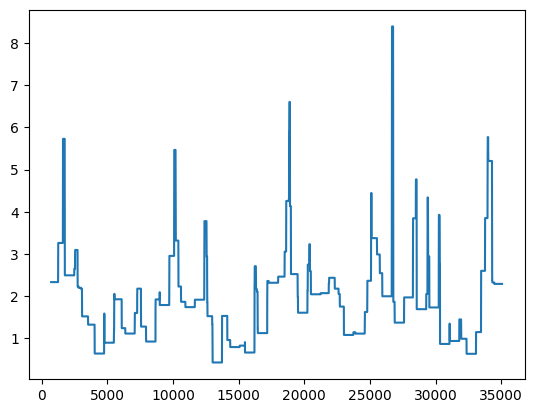

In [11]:
mean_solar_wind_4h_montly_min=reduce_series(mean_solar_wind_4h,time_granularity=24*30,reducers_func="min")
mean_solar_wind_4h_montly_min.plot()

<Axes: >

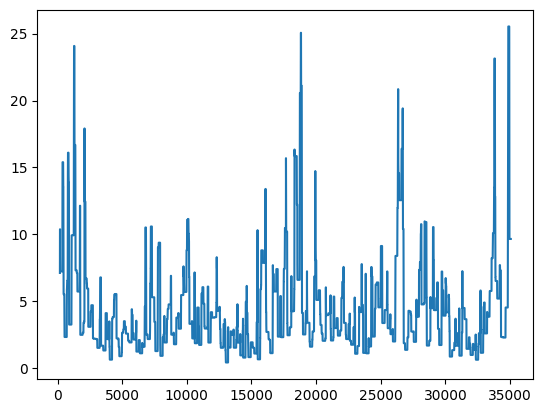

In [12]:
mean_solar_wind_4h_montly_min=reduce_series_sequentially(solar_and_wind,[4,6*30],["mean","min"])
mean_solar_wind_4h_montly_min.plot()

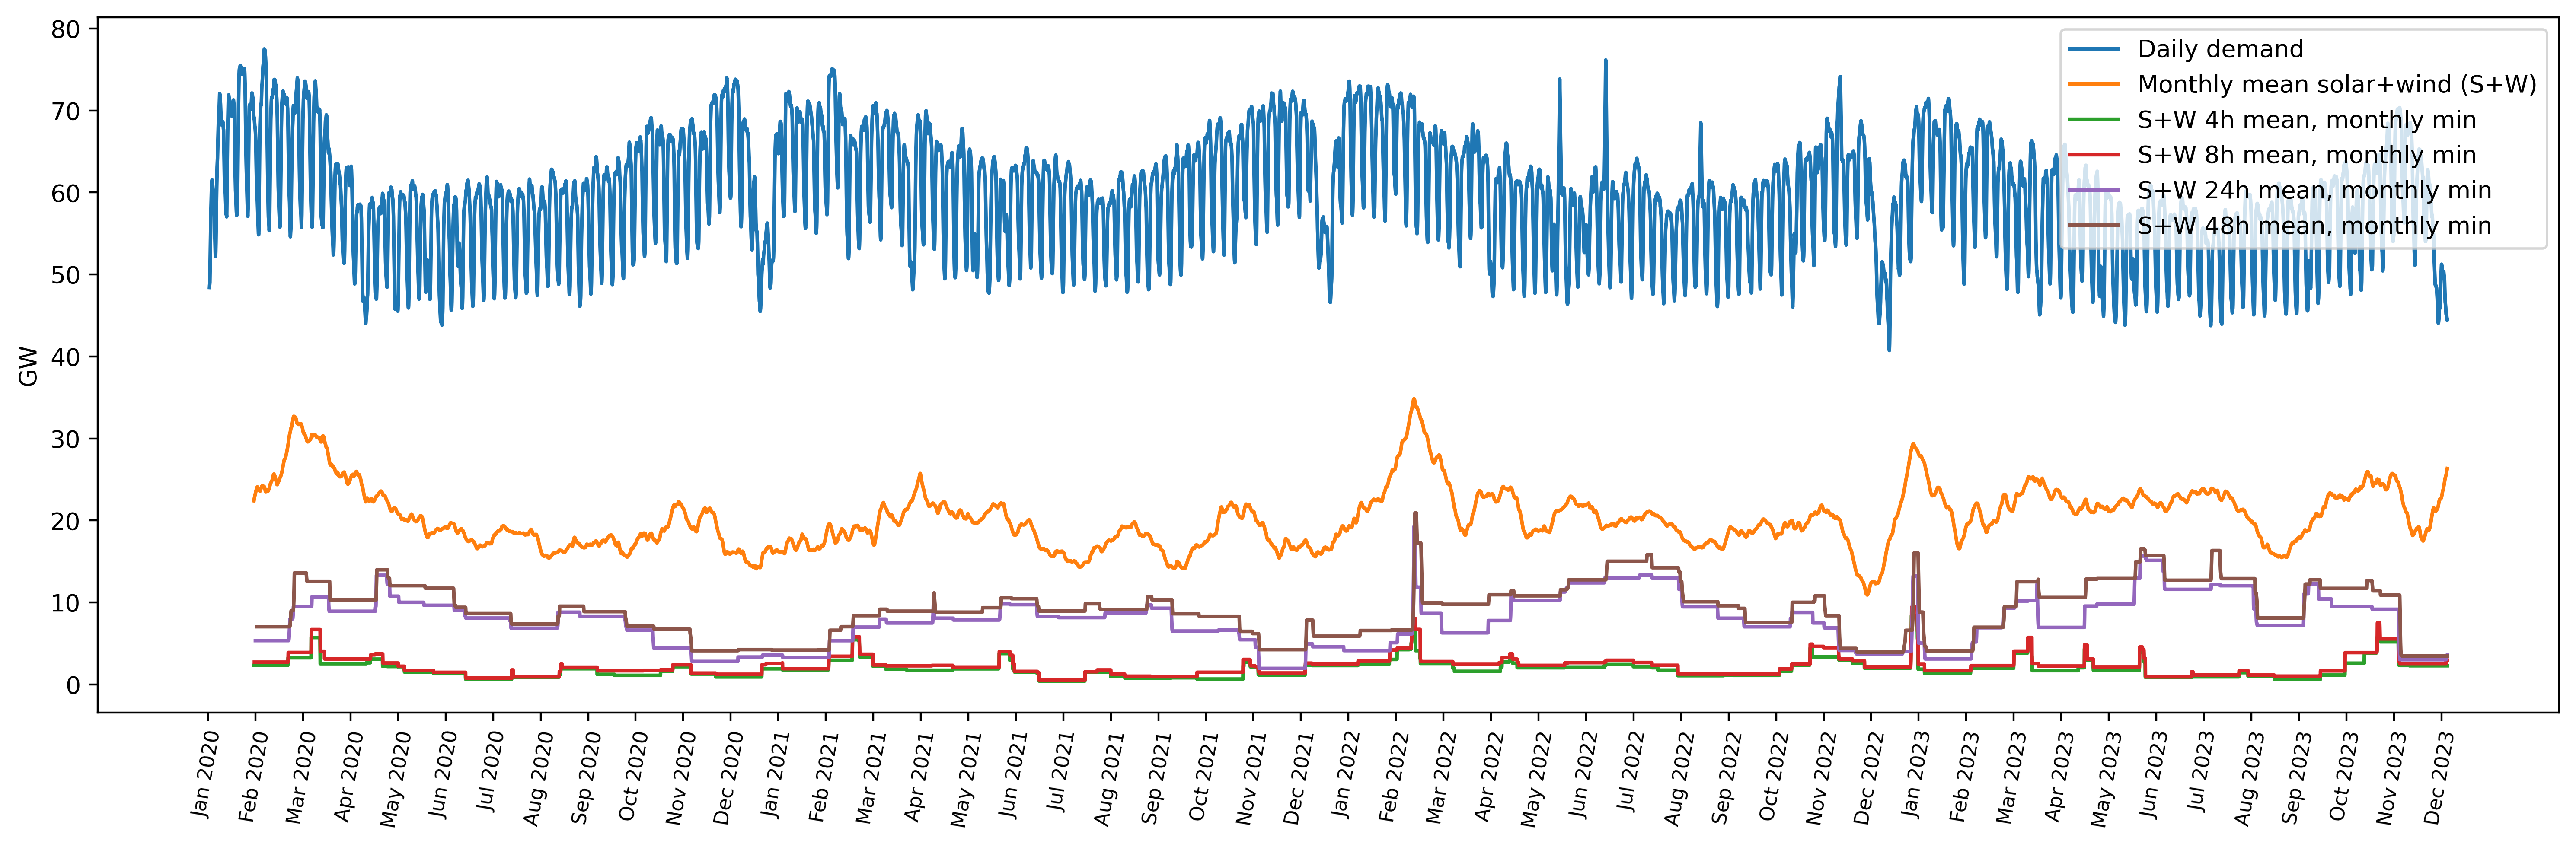

In [54]:
wind_solar_avg=reduce_series_sequentially(solar_and_wind,[24*30],["mean"])
total_demand_meaned=reduce_series_sequentially(total_demand,[24],["mean"])
x_ticks=month+" " +year.astype(str)
x=range(len(x_ticks))
mean_granularities=[4,8,24,48]
legend_names=["Daily demand","Monthly mean solar+wind (S+W)"]
fig=plt.figure(figsize=[15,5],tight_layout=True,dpi=400)
ax = fig.add_subplot(111)
ax.plot(x,total_demand_meaned)
ax.plot(x,wind_solar_avg)
for mean_granularity in mean_granularities:
  mean_min_solar_wind=reduce_series_sequentially(solar_and_wind,[mean_granularity,24*30],["mean","min"])
  ax.plot(x,mean_min_solar_wind)
  legend_names.append(f"S+W {mean_granularity}h mean, monthly min")
plot=ax.legend(legend_names,loc='upper right')
n=24*31
x_ticks_labels=[x_tick  for i,x_tick in enumerate(x_ticks) if i%n==0  ]
x_range=[i  for i,x_tick in enumerate(x_ticks) if i%n==0  ]
ax.set_xticks(x_range, x_ticks_labels, size='small',rotation=80)
ax.set_ylabel("GW")
plt.show()

In [28]:
#x_ticks=[x_tick if i%n==0 else "" for i,x_tick in enumerate(x_ticks)  ]
print(x_ticks)

0        2020Jan\n
1        2020Jan\n
2        2020Jan\n
3        2020Jan\n
4        2020Jan\n
           ...    
35059    2023Dec\n
35060    2023Dec\n
35061    2023Dec\n
35062    2023Dec\n
35063    2024Jan\n
Name: date_id, Length: 35061, dtype: object


In [14]:
len(mean_solar_wind_4h_montly_min)

35061